In [1]:
ls cell_images

 Volume in drive C is Windows
 Volume Serial Number is 1C4B-5090

 Directory of C:\Users\saksh\Desktop\Coding\Malaria project\cell_images

08-07-2021  22:15    <DIR>          .
08-07-2021  22:15    <DIR>          ..
08-07-2021  22:11    <DIR>          test
08-07-2021  22:11    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  17,152,843,776 bytes free


In [2]:
import os
for dirpath,dirnames,filenames in os.walk("cell_images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'cell_images'
There are 2 directories and 0 images in 'cell_images\test'
There are 0 directories and 2756 images in 'cell_images\test\Parasitized'
There are 0 directories and 2756 images in 'cell_images\test\Uninfected'
There are 2 directories and 0 images in 'cell_images\train'
There are 0 directories and 11024 images in 'cell_images\train\Parasitized'
There are 0 directories and 11024 images in 'cell_images\train\Uninfected'


In [3]:
#get the class names
import numpy as np
import pathlib
data_directory = pathlib.Path("cell_images/test")
class_names = np.array(sorted([file.name for file in data_directory.glob("*")]))
print(class_names)

['Parasitized' 'Uninfected']


In [4]:
#check the directories
for dirpath,dirnames,filenames in os.walk("cell_images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'cell_images'
There are 2 directories and 0 images in 'cell_images\test'
There are 0 directories and 2756 images in 'cell_images\test\Parasitized'
There are 0 directories and 2756 images in 'cell_images\test\Uninfected'
There are 2 directories and 0 images in 'cell_images\train'
There are 0 directories and 11024 images in 'cell_images\train\Parasitized'
There are 0 directories and 11024 images in 'cell_images\train\Uninfected'


In [5]:
#Visualizing the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def visualize_image(directory,cell_class):
    folder = directory + cell_class
    
    #get a random image from the folder
    random_img = random.sample(os.listdir(folder),4)
    
#     print(len(random_img))
    plt.figure(figsize=(12,12))
    #plot the random image
    for i in range(len(random_img)):
        plt.subplot(2,2,i+1)
        img = mpimg.imread(folder + "/" + random_img[i])
        plt.imshow(img)
        plt.title(cell_class,fontsize=20)
        plt.xlabel(f"Image shape: {img.shape}",fontsize=20) #show the shape of the image
    

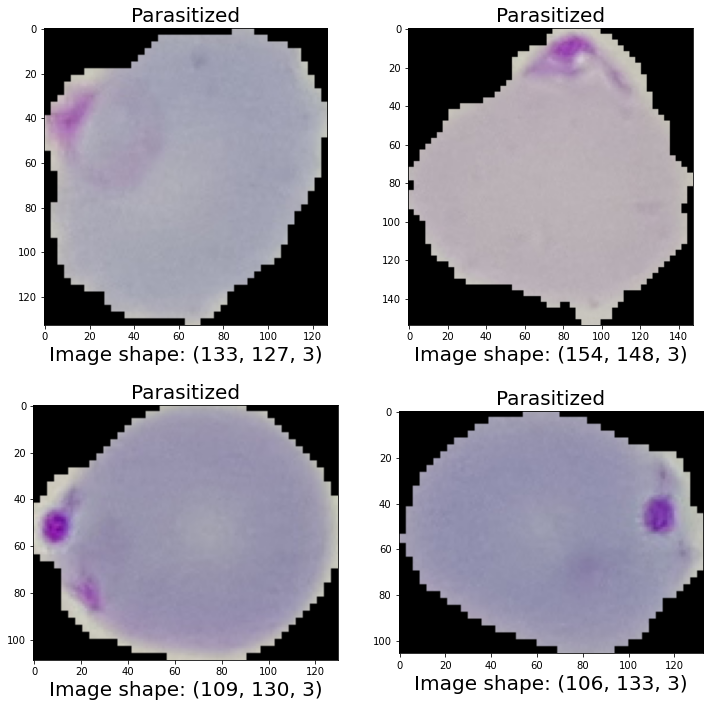

In [6]:
#view random image of parasitized cells in the training data
img = visualize_image(directory="cell_images/train/",cell_class="Parasitized")

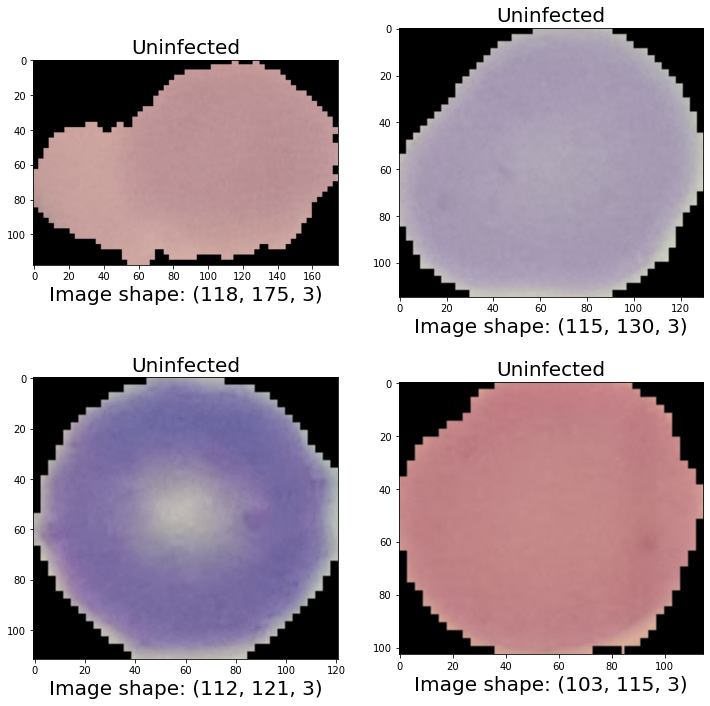

In [7]:
#View random images of uninfected cell in the training data
visualize_image(directory="cell_images/train/",cell_class="Uninfected")

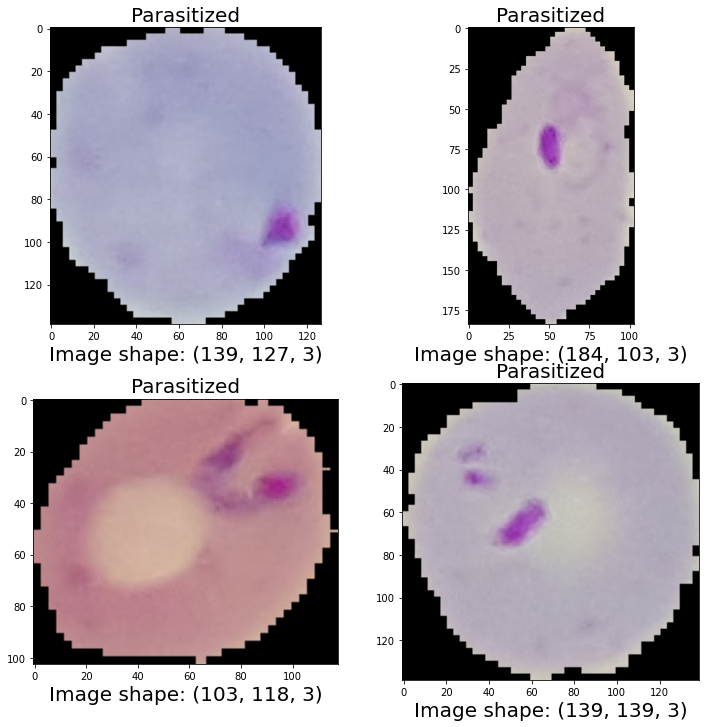

In [8]:
#View random images of parasitized cell in the testing data
visualize_image(directory="cell_images/test/",cell_class="Parasitized")

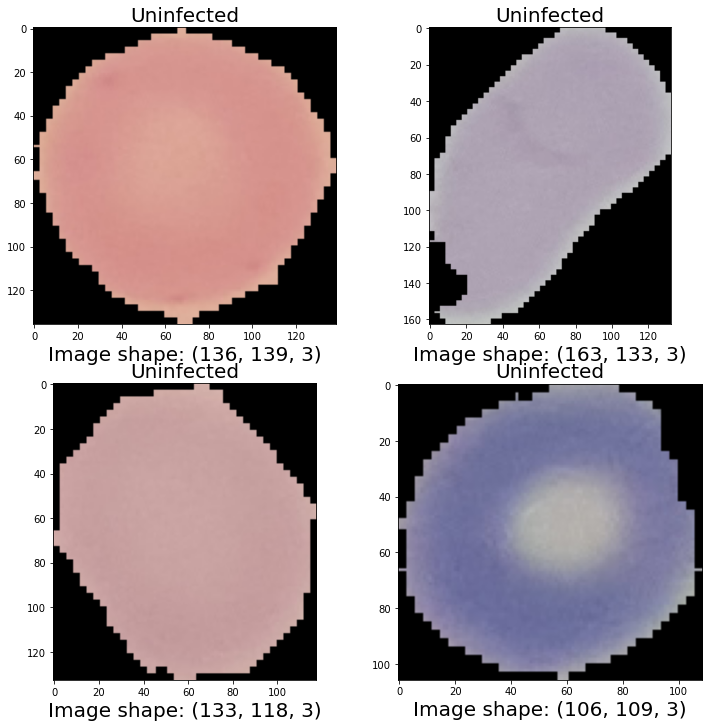

In [9]:
#View random images of uninfected cell in the testing data
visualize_image(directory="cell_images/test/",cell_class="Uninfected")

In [10]:
#specifying our traing data directory and testing data directory
train_data_dir = "cell_images/train/"
test_data_dir = "cell_images/test/"

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Normalizing pixels values b/w 0 and 1
train_data_generator = ImageDataGenerator(rescale=1/255.)
test_data_generator = ImageDataGenerator(rescale=1/255.)

In [12]:
#genrating our data set
train_data = train_data_generator.flow_from_directory(directory=train_data_dir,
                                                    target_size=(256,256),
                                                    class_mode="binary",
                                                    batch_size=32,
                                                    shuffle=True)

test_data = test_data_generator.flow_from_directory(directory=test_data_dir,
                                                    target_size=(256,256),
                                                    class_mode="binary",
                                                    batch_size=32,
                                                    shuffle=True)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [13]:
#total number of batches
len(train_data)

689

## Creating Model Checkpoints

In [14]:
# Create a function to implement ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):
    """
    Creates a directory to save modelcheckpoint
    Parameters
    ----------
    model_name:
                type = str
                The name of the experiment we are running
    save_path :
                type = str
                The name of the folder in which we want to save all our modelcheckpoints
                Default:"model_experiments"
    monitor : 
                default="val_loss"
                Automatically dave the results at the epoch where the validation loss 
                is minimun
    """
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,
                                                                    model_name),
                                              monitor="val_loss",
                                             verbose=0, #only output a limited amount of text
                                             save_best_only=True)

# Create tensorboard callbacks

In [15]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.

    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

    Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    """
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

# Model 1

In [16]:
#create the CNN model

# 1. Model architecture
# Conv2D -> MaxPool2D -> Conv2D -> MaxPool2D -> Conv2D -> MaxPool2D -> Flatten -> Dense(10) -> Dense(10) -> Dense(1,"sigmoid")
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# tf.random.set_seed(42)
# inputs = tf.keras.layers.Input(shape=(256,256,3))
# x = tf.keras.layers.Conv2D(filters=10,
#                           kernel_size=3,
#                           activation="relu",
#                           input_shape=(256,256,3))(inputs)

# x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Conv2D(filters=10,
#                           kernel_size=3,
#                           activation="relu")(x)

# x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Conv2D(filters=10,
#                           kernel_size=3,
#                           activation="relu")(x)
# x = tf.keras.layers.MaxPool2D()(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(10,activation="relu")(x)
# x =  tf.keras.layers.Dense(10,activation="relu")(x)
# output = tf.keras.layers.Dense(1,activation="sigmoid")(x)
# model = tf.keras.Model(inputs=inputs,outputs=output,name="model_1")


# 2. Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
         
      metrics=["accuracy"])

In [17]:
#model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9000)              0

In [18]:
# history_1 = model_1.fit(train_data,
#                        epochs=5,
#                        steps_per_epoch=len(train_data),
#                        validation_data=test_data,
#                        validation_steps=len(test_data),
#                        callbacks=[create_model_checkpoint(model_name=model.name),
#                        create_tensorboard_callback(dir_name="models",
#                                                  experiment_name=model.name)])

history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[create_model_checkpoint(model_name="model_1#"),
                       create_tensorboard_callback(dir_name="models",
                                                 experiment_name="model_1#")])

Saving TensorBoard log files to: models/model_1#/20210920-003632
Epoch 1/5
689/689 [==============================] - 64s 81ms/step - loss: 0.4701 - accuracy: 0.7444 - val_loss: 0.2243 - val_accuracy: 0.9169
INFO:tensorflow:Assets written to: model_experiments\model_1#\assets
Epoch 2/5
689/689 [==============================] - 40s 59ms/step - loss: 0.1997 - accuracy: 0.9300 - val_loss: 0.1946 - val_accuracy: 0.9334
INFO:tensorflow:Assets written to: model_experiments\model_1#\assets
Epoch 3/5
689/689 [==============================] - 41s 60ms/step - loss: 0.1777 - accuracy: 0.9370 - val_loss: 0.2096 - val_accuracy: 0.9361
Epoch 4/5
689/689 [==============================] - 44s 63ms/step - loss: 0.1652 - accuracy: 0.9405 - val_loss: 0.1891 - val_accuracy: 0.9380
INFO:tensorflow:Assets written to: model_experiments\model_1#\assets
Epoch 5/5
689/689 [==============================] - 40s 58ms/step - loss: 0.1473 - accuracy: 0.9462 - val_loss: 0.1808 - val_accuracy: 0.9372
INFO:tensorfl

In [29]:
# plot the validation andtraining curves seperately
def plot_loss_curves(history,x=5,y=6):
    """
    Returns loss curves for training and validation metrics
    
    Parameters
    ----------
    history : the value returned by model.fit
    x : length of size of graph 
    y : width of size of graph
    """
    loss = history.history['loss']
    val_loss = history.history["val_loss"]
    
    epochs = range(len(history.history["loss"])) #for how many epochs did our model fir for
    
    #Plot loss
    plt.figure(figsize=(x,y))
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    
    
    acc = history.history['accuracy']
    val_acc = history.history["val_accuracy"]
    plt.figure(figsize=(x,y))
    plt.plot(epochs,acc,label="training_accuracy")
    plt.plot(epochs,val_acc,label="validation_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()


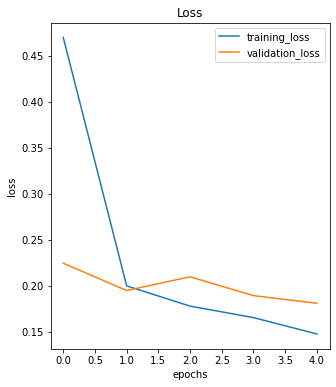

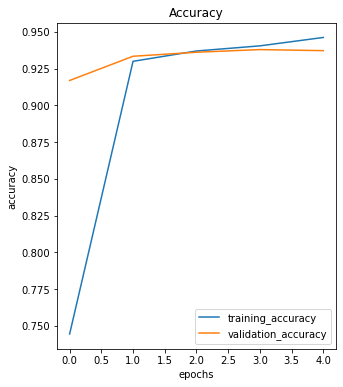

In [45]:
plot_loss_curves(history_1)

In [16]:
model = tf.keras.models.load_model("model_experiments/model_1#")
model.evaluate(test_data)

173/173 [==============================] - 23s 77ms/step - loss: 0.1808 - accuracy: 0.9372


[0.18075841665267944, 0.9372278451919556]

# Model 2

In [21]:
#create the CNN model

# 1. Model architecture
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="tanh",
                          input_shape=(256,256,3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="tanh"),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="tanh"),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 10)      280       
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 10)      910       
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 10)        910       
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9000)             

In [23]:
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[create_model_checkpoint(model_name="model_2#"),
                       create_tensorboard_callback(dir_name="models",
                                                 experiment_name="model_2#")])

Saving TensorBoard log files to: models/model_2#/20210920-004650
Epoch 1/5
689/689 [==============================] - 44s 63ms/step - loss: 0.6942 - accuracy: 0.5039 - val_loss: 0.6933 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: model_experiments\model_2#\assets
Epoch 2/5
689/689 [==============================] - 40s 58ms/step - loss: 0.6935 - accuracy: 0.4988 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
689/689 [==============================] - 39s 56ms/step - loss: 0.6935 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: model_experiments\model_2#\assets
Epoch 4/5
689/689 [==============================] - 40s 58ms/step - loss: 0.6935 - accuracy: 0.4987 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/5
689/689 [==============================] - 41s 60ms/step - loss: 0.6935 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5000


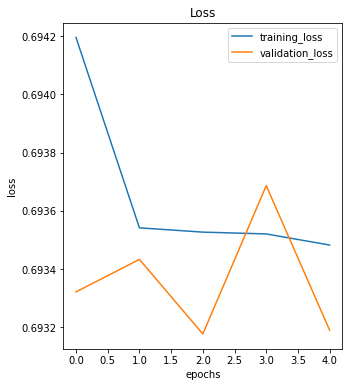

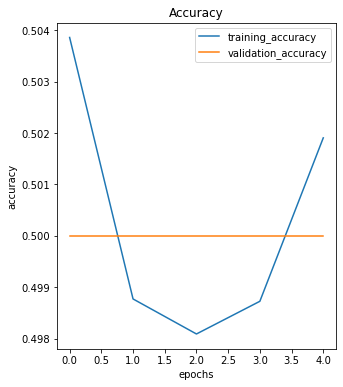

In [47]:
plot_loss_curves(history_2)

In [17]:
model = tf.keras.models.load_model("model_experiments/model_2#")
model.evaluate(test_data)

173/173 [==============================] - 8s 44ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931775808334351, 0.5]

# Performing data augmentation

In [19]:
augmented_train_data_generator = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.25,
                                         zoom_range=0.25,
                                         height_shift_range=0.25,
                                         width_shift_range=0.25,
                                         shear_range=0.3)
test_data = ImageDataGenerator(rescale=1/255.)

In [20]:
augmented_train_data = augmented_train_data_generator.flow_from_directory(directory=train_data_dir,
                                                             target_size=(256,256),
                                                             class_mode="binary",
                                                             shuffle=True,
                                                             batch_size=32)

test_data = test_data_generator.flow_from_directory(directory=test_data_dir,
                                                  target_size=(256,256),
                                                  class_mode="binary",
                                                  batch_size=32,
                                                  shuffle=True)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


# Model 3

In [50]:
#create the CNN model
#Model 3
# 1. Model architecture
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

In [51]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 10)        910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9000)             

In [52]:
len(test_data)

173

In [53]:
history_3 = model_3.fit(augmented_train_data,
                       epochs=5,
                       steps_per_epoch=len(augmented_train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[create_model_checkpoint(model_name="model_3#"),
                       create_tensorboard_callback(dir_name="models",
                                                 experiment_name="model_3#")])

Saving TensorBoard log files to: models/model_3#/20210920-010258
Epoch 1/5
689/689 [==============================] - 237s 343ms/step - loss: 0.4372 - accuracy: 0.7960 - val_loss: 0.2043 - val_accuracy: 0.9352
INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


Epoch 2/5
689/689 [==============================] - 230s 334ms/step - loss: 0.2929 - accuracy: 0.8979 - val_loss: 0.1930 - val_accuracy: 0.9336
INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


Epoch 3/5
689/689 [==============================] - 227s 330ms/step - loss: 0.2749 - accuracy: 0.9046 - val_loss: 0.1785 - val_accuracy: 0.9383
INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


Epoch 4/5
689/689 [==============================] - 227s 330ms/step - loss: 0.2569 - accuracy: 0.9065 - val_loss: 0.1793 - val_accuracy: 0.9394
Epoch 5/5
689/689 [==============================] - 228s 331ms/step - loss: 0.2522 - accuracy: 0.9054 - val_loss: 0.1620 - val_accuracy: 0.9372
INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


INFO:tensorflow:Assets written to: model_experiments\model_3#\assets


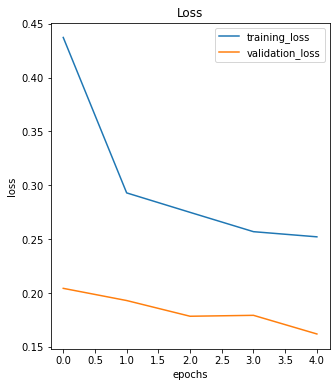

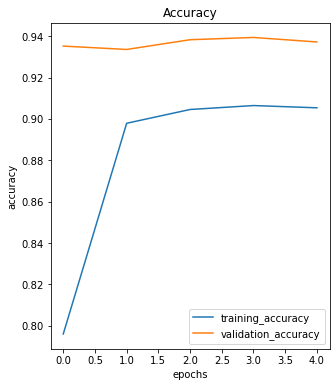

In [55]:
plot_loss_curves(history_3)

In [21]:
model = tf.keras.models.load_model("model_experiments/model_3#")
model.evaluate(test_data)

173/173 [==============================] - 9s 54ms/step - loss: 0.1620 - accuracy: 0.9372 1s - loss: 0.1621 - ac - ETA: 1s


[0.16200760006904602, 0.9372278451919556]

# Model 4

In [22]:
#create the CNN model

# 1. Model architecture
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                          kernel_size=3,
                          activation="selu",
                          padding="same",
                          input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation="selu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=16,
                          kernel_size=3,
                          activation="selu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3,
                      activation="selu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3,
                      activation="selu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=["accuracy"])

In [23]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 10)        1

In [27]:
history_4 = model_4.fit(augmented_train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       callbacks=[create_model_checkpoint(model_name="model_4#"),
                       create_tensorboard_callback(dir_name="models",
                                                 experiment_name="model_4#")])

Saving TensorBoard log files to: models/model_4#/20210920-074104
Epoch 1/5
689/689 [==============================] - 224s 325ms/step - loss: 0.6931 - accuracy: 0.5069 - val_loss: 0.6931 - val_accuracy: 0.5005
INFO:tensorflow:Assets written to: model_experiments\model_4#\assets
Epoch 2/5
689/689 [==============================] - 232s 336ms/step - loss: 0.6510 - accuracy: 0.5679 - val_loss: 0.2466 - val_accuracy: 0.9280
INFO:tensorflow:Assets written to: model_experiments\model_4#\assets
Epoch 3/5
689/689 [==============================] - 231s 336ms/step - loss: 0.2848 - accuracy: 0.9025 - val_loss: 0.1573 - val_accuracy: 0.9548
INFO:tensorflow:Assets written to: model_experiments\model_4#\assets
Epoch 4/5
689/689 [==============================] - 20044s 29s/step - loss: 0.2493 - accuracy: 0.9153 - val_loss: 0.1572 - val_accuracy: 0.9472
INFO:tensorflow:Assets written to: model_experiments\model_4#\assets
Epoch 5/5
689/689 [==============================] - 244s 354ms/step - loss: 0.

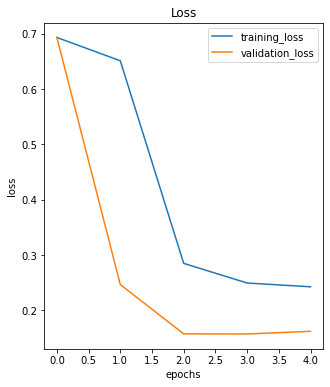

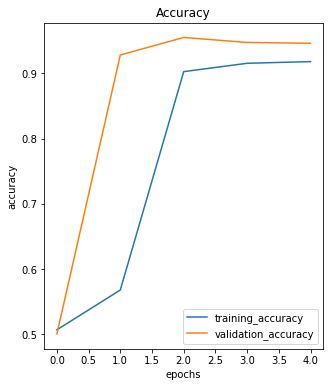

In [30]:
plot_loss_curves(history_4)

In [31]:
model = tf.keras.models.load_model("model_experiments/model_4#")
model.evaluate(test_data)

173/173 [==============================] - 8s 46ms/step - loss: 0.1572 - accuracy: 0.9472


[0.15718984603881836, 0.9472060799598694]